Project 1  Rubric.   Boot Camp: Data Visualization and Data Analytics 
Question 4 Analysis
Source Data file: 'clean_states.csv', a subset of the dataset ‘USA Real Estate Datatest’ from Kaggle.com https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
Represent the house prices by cities on a plot. (would like to do the line plot each line in a different color for all the States-Cities or in a Scatter Plot, or/and a scatter plot for NY with its cities.  
So far what I see is that the mean for each state is for houses with 3 bedrooms and 2 bathrooms.  
I need to remove some of the 'imports I have here below' 
 
4 selected states: Connecticut, Massachusetts, New Jersey, New York. 
Average Price and Standard Deviation (std) for each State. Or just one state with the highest std; this is NY. 
Scatter Plot each city with different tick size for each city, and a different color for each state. 

(Questions: 1. Duplicates: were these records removed based on criteria for example Sold Date, and Address? If not, we can just mention that in our report/presentation.
2. The df created an Unmaed:0 at the 0 index, I think these are the row numbers assigned to the records in the dataset that were or could be used as the House ID?   I did remove that column in one of the cells below.) 

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import os

In [4]:
#read csv file
states_df=pd.read_csv("clean_states.csv")
states_df

,Unnamed: 0,price,bed,bath,acre_lot,house_size,state,city
0,27821,579900.0,4.0,3.0,2.34,3320.0,Connecticut,Coventry
1,27826,215000.0,2.0,1.0,0.91,960.0,Connecticut,East Windsor
2,27828,144900.0,2.0,1.0,0.36,860.0,Connecticut,Vernon
3,27829,174900.0,3.0,2.0,0.19,1280.0,Connecticut,Manchester
4,27830,289900.0,4.0,2.0,0.38,1617.0,Connecticut,East Windsor
...,...,...,...,...,...,...,...,...
185883,733133,475000.0,4.0,3.0,0.23,2252.0,New Jersey,South Brunswick
185884,733136,350000.0,2.0,2.0,0.01,1551.0,New Jersey,Piscataway
185885,733146,241000.0,2.0,2.0,0.50,1077.0,New Jersey,North Brunswick
185886,733147,629000.0,5.0,2.0,0.06,2084.0,New Jersey,New Brunswick


In [5]:
#find the Average/ Mean of house prices, and the Standard Deviation. 
states_df.groupby("state").agg(["mean","std"]).round()

C:\Users\Owner\AppData\Local\Temp\ipykernel_26956\3925755002.py:2: FutureWarning: ['city'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  states_df.groupby("state").agg(["mean","std"]).round()


Unnamed: 0               price            bed      bath       \
                    mean       std      mean       std mean  std mean  std   
state                                                                        
Connecticut     366855.0  130123.0  326020.0  146810.0  3.0  1.0  2.0  1.0   
Massachusetts   142859.0   71148.0  645017.0  366150.0  3.0  1.0  2.0  1.0   
New Jersey      646053.0   63552.0  395038.0  202851.0  3.0  1.0  2.0  1.0   
New York        514894.0  104704.0  764468.0  442436.0  3.0  1.0  2.0  1.0   

              acre_lot      house_size         
                  mean  std       mean    std  
state                                          
Connecticut        1.0  1.0     1716.0  655.0  
Massachusetts      0.0  0.0     1860.0  839.0  
New Jersey         0.0  0.0     1760.0  668.0  
New York           0.0  0.0     1798.0  761.0

Std for State of New York has the highest number compared to Connecticut, Massachusetts, and New Jersey
The standard deviation measures how far apart the numbers are from the mean of the data set.
Interestingly, the average number of bedrooms is 3 with 2 bathrooms

In [6]:
states_df.columns

Index(['Unnamed: 0', 'price', 'bed', 'bath', 'acre_lot', 'house_size', 'state',
       'city'],
      dtype='object')

In [7]:
# # x axis = list of the states
# state = ["Connecticut", "Massachusetts", "New Jersey", "New York"]
# price = [states_df["price"]]
# state1 = 'Connecticut'
# state2=  ' Massachusetts'
# state3 =  'New Jersey'
# state4 = 'New York'

# # Plot line for Connecticut
# plt.plot(state, price, color="green", label=state1)

# # Plot line for Massachusetts
# plt.plot(state, price, color="blue", label=state2)

# # Plot line for New Jersey
# plt.plot(state, price, color="orange", label=state3)

# # Plot line for New York
# plt.plot(state, price, color="orange", label=state4)

# # Place a legend on the chart in what matplotlib believes to be the "best" location
# plt.legend(loc="best")
# plt.title("House Prices by State")
# plt.xlabel("city")
# plt.xticks(np.arange(min(state), max(states)+1, 1.0))
# plt.ylabel("% Travelers")

# # Print our chart to the screen
# plt.show()

In [8]:
ny_cities_df = states_df[states_df['state'] == 'New York']
ny_cities_df


,Unnamed: 0,price,bed,bath,acre_lot,house_size,state,city
49777,54258,225000.0,4.0,2.0,0.24,1239.0,New York,Copake
49778,54530,40000.0,2.0,1.0,0.20,690.0,New York,Nassau
49779,54531,125000.0,3.0,2.0,1.00,980.0,New York,Hoosick Falls
49780,54539,299900.0,3.0,1.0,0.32,1608.0,New York,Niverville
49781,54542,379500.0,4.0,3.0,0.28,2080.0,New York,Philmont
...,...,...,...,...,...,...,...,...
63457,732127,1750000.0,2.0,1.0,0.41,1001.0,New York,New York City
63458,732237,1650000.0,1.0,1.0,0.24,718.0,New York,New York City
63459,732292,1591380.0,1.0,2.0,0.05,883.0,New York,New York City
63460,732295,2250000.0,2.0,3.0,0.05,1252.0,New York,New York City


In [9]:
# #drop row indexing number from original raw data file. Or del ny_cities_df['Unnamed:0']
ny_cities_df = ny_cities_df[['price', 'bed', 'bath', 'acre_lot', 'house_size', 'state', 'city']]
ny_cities_df = ny_cities_df.dropna()
ny_cities_df

,price,bed,bath,acre_lot,house_size,state,city
49777,225000.0,4.0,2.0,0.24,1239.0,New York,Copake
49778,40000.0,2.0,1.0,0.20,690.0,New York,Nassau
49779,125000.0,3.0,2.0,1.00,980.0,New York,Hoosick Falls
49780,299900.0,3.0,1.0,0.32,1608.0,New York,Niverville
49781,379500.0,4.0,3.0,0.28,2080.0,New York,Philmont
...,...,...,...,...,...,...,...
63457,1750000.0,2.0,1.0,0.41,1001.0,New York,New York City
63458,1650000.0,1.0,1.0,0.24,718.0,New York,New York City
63459,1591380.0,1.0,2.0,0.05,883.0,New York,New York City
63460,2250000.0,2.0,3.0,0.05,1252.0,New York,New York City


In [10]:
ny_cities= ny_cities_df.groupby('city')
ny_cities.count()

,price,bed,bath,acre_lot,house_size,state
city,,,,,,
Airmont,26,26,26,26,26,26
Amenia,14,14,14,14,14,14
Arden,5,5,5,5,5,5
Ardsley,22,22,22,22,22,22
Argyle,30,30,30,30,30,30
...,...,...,...,...,...,...
Witherbee,5,5,5,5,5,5
Woodhaven,27,27,27,27,27,27
Woodside,68,68,68,68,68,68


In [11]:
ny_cities_df.columns

Index(['price', 'bed', 'bath', 'acre_lot', 'house_size', 'state', 'city'], dtype='object')

In [12]:
# # Create a scatter plot which comppares House Prices by City
# ny_cities.plot = (kind="scatter", x="city", y="price", grid=True, figsize=(8,8),
#                   title="New York House Prices for cities")
# plt.show()

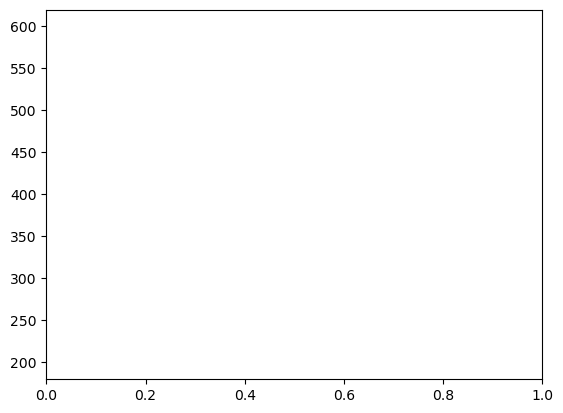

In [13]:
# Set the upper and lower limits of our y axis
plt.ylim(180,620)
plt.show()

NameError: name 'x_axis' is not defined

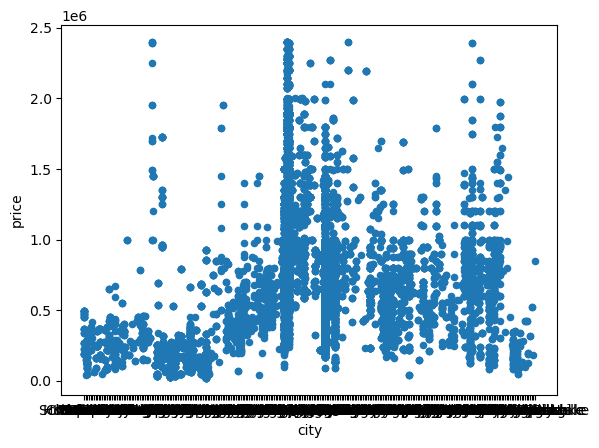

In [14]:
#scatter plot
ny_cities_df.plot.scatter(x='city',y='price')
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.show()

In [ ]:
ct_cities_df = states_df[states_df['state'] == 'Connecticut']
ct_df


,Unnamed: 0,price,bed,bath,acre_lot,house_size,state,city
23,28589,329000.0,2.0,2.0,2.33,1872.0,Connecticut,Winchester
147,29373,247900.0,2.0,2.0,0.28,947.0,Connecticut,Windsor Locks
181,29494,199900.0,2.0,2.0,0.29,1056.0,Connecticut,Enfield
247,30330,264800.0,2.0,2.0,1.20,1396.0,Connecticut,New Hartford
259,30362,237500.0,2.0,2.0,0.46,768.0,Connecticut,Farmington
...,...,...,...,...,...,...,...,...
49714,463871,465000.0,2.0,2.0,0.23,1193.0,Connecticut,Norwalk
49717,463876,419000.0,2.0,2.0,0.16,1351.0,Connecticut,Norwalk
49719,463880,499000.0,2.0,2.0,0.12,956.0,Connecticut,Norwalk
49743,464083,759000.0,2.0,2.0,0.14,1419.0,Connecticut,Stamford


In [ ]:
ma_cities_df = states_df[states_df['state'] == 'Massachusetts']
ma_cities_df

,Unnamed: 0,price,bed,bath,acre_lot,house_size,state,city
63482,24288,397000.0,2.0,2.0,0.51,2000.0,Massachusetts,Granby
63488,24294,389900.0,2.0,2.0,0.92,1723.0,Massachusetts,Whately
63501,24312,275000.0,2.0,2.0,0.05,1200.0,Massachusetts,Chicopee
63513,24332,189900.0,2.0,2.0,0.23,1200.0,Massachusetts,Barre
63568,25031,595000.0,2.0,2.0,0.49,1264.0,Massachusetts,Shelburne
...,...,...,...,...,...,...,...,...
134422,455728,209900.0,2.0,2.0,0.15,1364.0,Massachusetts,Dalton
134431,456813,709000.0,2.0,2.0,0.37,1952.0,Massachusetts,Otis
134447,460151,369000.0,2.0,2.0,0.84,1852.0,Massachusetts,Great Barrington
134455,460631,139000.0,2.0,2.0,0.88,1193.0,Massachusetts,Sheffield


In [ ]:
nj_cities_df = states_df[states_df['state'] == 'New Jersey']
nj_cities_df

,Unnamed: 0,price,bed,bath,acre_lot,house_size,state,city
134478,463568,339900.0,2.0,2.0,0.11,1456.0,New Jersey,Avenel
134517,463923,499000.0,2.0,2.0,0.09,1156.0,New Jersey,Bloomfield
134545,464396,389900.0,2.0,2.0,0.02,1240.0,New Jersey,Cranford
134554,464487,459000.0,2.0,2.0,0.45,1288.0,New Jersey,Edgewater
134570,464575,315000.0,2.0,2.0,0.17,1044.0,New Jersey,Carteret
...,...,...,...,...,...,...,...,...
185841,733016,279900.0,2.0,2.0,0.01,1412.0,New Jersey,South Brunswick
185870,733100,260000.0,2.0,2.0,0.02,1128.0,New Jersey,Somerset
185872,733103,295000.0,2.0,2.0,0.01,1082.0,New Jersey,Piscataway
185884,733136,350000.0,2.0,2.0,0.01,1551.0,New Jersey,Piscataway


In [ ]:
# #set index as state
# states_df= states_df.set_index ("state")
# states_df

,Unnamed: 0,price,bed,bath,acre_lot,house_size,city
state,,,,,,,
Connecticut,28589,329000.0,2.0,2.0,2.33,1872.0,Winchester
Connecticut,29373,247900.0,2.0,2.0,0.28,947.0,Windsor Locks
Connecticut,29494,199900.0,2.0,2.0,0.29,1056.0,Enfield
Connecticut,30330,264800.0,2.0,2.0,1.20,1396.0,New Hartford
Connecticut,30362,237500.0,2.0,2.0,0.46,768.0,Farmington
...,...,...,...,...,...,...,...
New Jersey,733016,279900.0,2.0,2.0,0.01,1412.0,South Brunswick
New Jersey,733100,260000.0,2.0,2.0,0.02,1128.0,Somerset
New Jersey,733103,295000.0,2.0,2.0,0.01,1082.0,Piscataway
